# **AM 207**: Homework 4

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday April 7th, 2016**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW4.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an executed status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW4.tar.gz or AM207_YOURNAME_HW4.zip


### Have Fun!
_ _ _ _ _

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time
import timeit

import scipy.stats 
import pandas as pd
import pymc as pm

import re
import numpy as np

/Users/Grace/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Problem 1: Bayesian Models for Yelp Check-in Data

Below is a visualization of Yelp checkins on a portion of the Las-Vegas strip. The goal of this problem is to model an intensity surface on this map which is indicative of the propensity of an individual to check in at a particular location.
<img src="Rplot.jpeg">
Such an intensity surface is very valuable for example to decide what would be good places to open another casino or restaurant. 

The first hierarchical model will use a conjugate prior (and hence we can compute an analytical solution) and the second will use a non-conjugate set up with correlated priors.

### Data description
We have M grid squares of width $w=0.005$. The variable `checkins` contains M checkin values, one for each square. The variable `X` contains the coordinates of the center of each square. This data set is a subset of the map shown above.

In [3]:
#load checkins
checkins = np.genfromtxt('checkin_counts.csv', delimiter=',')
#load latitude and longitude values associated with each count value
X = np.genfromtxt('X.csv', delimiter=',')
#set M to the length of the checkins vector
M = checkins.size
#set grid width w to be .0005 latitude/longitude
w = .0005

In [15]:
checkins[1000:1100]

array([  587.,    18.,     0.,  1096.,     0.,     0.,     0.,  1331.,
         288.,     0.,  6837.,  1706.,    37.,     0.,     0.,     0.,
           0.,     0.,     0.,  1673.,  1014.,    45.,   615.,     0.,
           0.,    56.,   275.,     0.,     0.,   942.,    22.,  1464.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,  1055.,
           0.,     0.,     0.,     0.,     0.,    11.,     0.,     0.,
           0.,    27.,  1794.,    25.,   253.,     0.,   137.,     0.,
           0.,     0.,     0.,    32.,  1078.,     0.,     0.,     0.,
         942.,   502.,   252.,     0.,  1190.,     0.,     0.,   283.,
        1089.,     0.,     0.,     0.,  8979.,   108.,     0.,   843.,
           0.,     0.,     0.,     0.,     0.,     0.,    20.,     0.,
           0.,  1893.,    66.,    11.,     0.,   432.,   327.,  2083.,
           0.,     0.,     0.,    45.])

### Conjugate Model
In the first model, we assume that a map (i.e., the Las Vegas strip) is discretized into $M$ grid squares of width $w$, and the checkins in cell $i$, denoted by $Y_i$, are distributed according to a $Pois(w^2\lambda_i)$ distribution. (That is, the check-ins follow a Poisson process conditioning on the $\lambda$, and $\lambda \in \mathbb{R}^m$ is the intensity surface we would like to infer.) Furthermore $\lambda_i$ is drawn from a conjugate $Gamma(\alpha, \beta)$ distribution. The $Y_i$ are conditionally independent on $\lambda_i$, and $\lambda_i$ is indepndent of $\lambda_j$ for $i \neq j$.

Derive the posterior distribution $p(\lambda_i|Y_i)$ for this model analytically as a function of hyperparameters $\alpha$ and $\beta$. Use the posterior mean as an estimate for $\lambda_i$, and then plot the posterior mean of $\lambda_i$ on a grid for varying values of $\alpha$ and $\beta$. Discuss if this model leads to a useful intensity surface, and how the usefulness of the result is influenced by the choice of $\alpha$ and $\beta$.

### 1) Derive the posterior distribution $p(\lambda_i|Y_i)$ for this model analytically as a function of hyperparameters $\alpha$ and $\beta$

$$
Likelihood = p(Y_i|\lambda_i) = L(\lambda_i | Y_i) = Poisson(w^2\lambda_i)
$$

$$
Prior = p(\lambda_i) = Gamma(\alpha, \beta)
$$

$$
Posterior = p(\lambda_i | Y_i) \propto p(Y_i | \lambda_i) p(\lambda_i) = Poisson(w^2\lambda_i) Gamma(\alpha, \beta) = Const \Big(e^{-w^2\lambda_i} \lambda_i^{Y_i} \lambda_i^{\alpha-1} e^{-\beta \lambda_i}\Big) = Const \Big( \lambda_i^{Y_i + \alpha -1} e^{-(w^2 + \beta )\lambda_i}\Big) = Gamma(Y_i+\alpha, w^2+\beta)
$$

### 2) Use the posterior mean as an estimate for $\lambda_i$

$$
Posterior\_mean = \hat{\lambda_i} = \frac{Y_i + \alpha}{w^2 + \beta
}
$$

* Reference : http://people.stat.sc.edu/Hitchcock/slides535day5spr2014.pdf

### 3) Plot the posterior mean of $\lambda_i$ on a grid for varying values of $\alpha$ and $\beta$

I tried several different pairs of (alpha, beta) values as below.

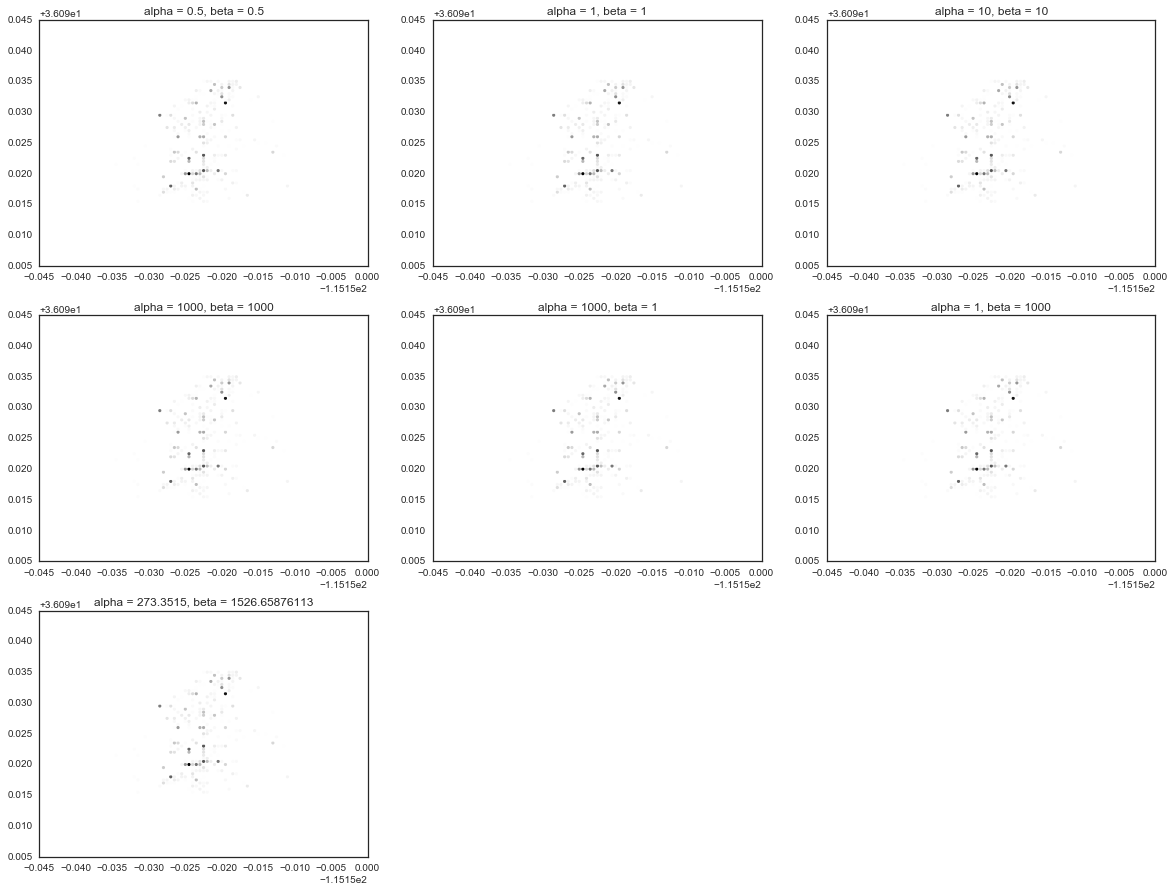

In [105]:
alphas = [0.5, 1, 10, 1000, 1000, 1, np.mean(checkins)]
betas = [0.5, 1, 10, 1000, 1, 1000, np.std(checkins)]

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

alpha_and_beta = zip(alphas, betas)

for i in range(len(alpha_and_beta)):
    plt.subplot(3, 3, i+1)
    a = alpha_and_beta[i][0]
    b = alpha_and_beta[i][1]
    intensity_surface = (checkins + a) / (w**2 + b)
    plot_checkins(intensity_surface)
    plt.title('alpha = ' + str(a) + ', beta = ' + str(b))

### 4) Discuss if this model leads to a useful intensity surface, and how the usefulness of the result is influenced by the choice of $\alpha$ and $\beta$.

As shown in graphs above, even with different alpha and beta values, our intensity surface were almost the same among all different (alpha, beta) pairs. This is because, when we consider the posterior mean formula, 

$$
Posterior\_mean = \hat{\lambda_i} = \frac{Y_i + \alpha}{w^2 + \beta
}
$$

$\alpha$ and $\beta$ just work as translation of $\hat{\lambda_i}$, which means $\alpha$ makes parallel translation to all the $Y_i$ values, and $\beta$ only works as a scaler that only changes the size of $Y_i$ values altogether with the same ratio. Therefore, it is natural that different pairs of ($\alpha, \beta$) give us the same result.

From this, we can conclude that this Conjugate Model does not lead us useful intensity surface, thereby requiring a different model to estimate our intensity surface.

### Non-Conjugate Model
Now let's move on to a slightly more complicated model. Again assume that the grid is discretized into $M$ cells of the same area, and the checkins in cell $i$, denoted by $Y_i$, are distributed according to a $Pois(w^2\lambda_i)$ distribution. However there is a twist: we assume $\lambda_i$ is equivalent to $exp[\alpha+Z_i]$ where $Z \in \mathbb{R}^{M}$ is drawn from a multivariate normal $MVN(0,\Sigma)$ distribution, where $\Sigma$ comes from a squared exponential kernel, and $\alpha$ is drawn according to a N(0,1) distribution. In this way, the $\lambda_i$ for distinct cells are no longer independent but are correlated.(If you'd like to delve deeper, this process is called a "Log-Guassian Cox process".)

Describe what the meaning of $\alpha$ and $\Sigma$ is for this model. 

We model $\Sigma$ using a square exponential kernel such that the covariances decay exponentially quickly as points get further apart from each other. That is $$\Sigma_{ij} = Exp[-||X_i-X_j||_2^2/\phi]$$

Where $X_i$ and $X_j$ are the $ith$ and $jth$ rows of $X$ respectively. Describe in which way the choice of $\phi$ influences the kernel. By default, use $\phi = .00001$. 

To simplify your code, consider the prior parameters/latent variables ($\alpha$, $Z$) jointly as a vector in $\mathbb{R}^{M+1}$. Determine the covariance matrix for the multivariate normal prior on this vector and store it all together in a variable called Sigma. Give a short explanation why we can do this. 
When you implement the computation of $Sigma$, small numerical instabilities can lead to a covariance matrix that is not positive-semidefinite. You can check this by attempting a Cholesky decomposition of $\Sigma$ with numpy. If it throws an error, you can add a small offset to the diagonal of the matrix to help with numerical stability. 

We will provide you with code for an elliptical slice sampler for this problem. This sampling method was directly devloped for problems like this and we will discuss it later in class. For now it is sufficient for you to use the code, without neccessarily understanding it. Use the provided sampler to estimate the posterior mean for this non-conjugate model. In addition implement the model also in PYMC or vanilla Metropolis Hastings, and compare the result. 

Finally discuss the differences in results from the conjugate and the non-conjugate model and which one you would prefer. 

### 1) Describe what the meaning of $\alpha$ and $\Sigma$ is for this model. 
* $\alpha$ is one of hyper_parameter for our prior p($\lambda_i$), and I guess the purpose of $\alpha$ is to measure the intensity surface based on the assumption that all $X_i, X_j$ are iid. Because by adding $\alpha$ term, the Sigma become 2001 dimension, adding a row that assume none of data pairs are dependent. So I think $\alpha$ is to put iid property which is different from what our Kernel assumes.
* $\Sigma$ is the covariance matrix for $Z$, which is one of hyper_parameter for our prior p($\lambda_i$). This covariance matrix $\Sigma$ is symmetric, but not diagonal as we assumed that now our $\lambda_i$ for distinct cells are no longer independent but correlated.
* When we see the definition of $\Sigma$, $$\Sigma_{ij} = Exp[-||X_i-X_j||_2^2/\phi]$$ we can see that $\Sigma$ is to reflect whether $\lambda_i$ and $\lambda_j$'s grid is located close or far away to each other. Since $||X_i-X_j||_2^2$ reflects the distance between 2 grid cells and $e^{-x}$ is decreasing function, so if the 2 distinct cells have long distance, it means those 2 cells are less correlated, otherwise it is strongly correlated. This actually makes sense, because if we imagine that a certain place is hot and popular, the nearby places will be crowded as well, having high intensity surface value.

### 2) Describe in which way the choice of $\phi$ influences the kernel.

* $\phi$ works as a scaler of the kernel, which changes the size of the Eucledian distance value between grid i and j. 
* If we put small number ( < 1 ) for $\phi$, it enlarges the distance even more, meaning we will make the covariances decay even more quickly as points get further apart from each other.
* Whereas, if we put larger number( > 1 ), then the distance value gets shrinked and it means we will make the covariances decay slowly even if points get further apart from each other.

### 3) Determine the covariance matrix for the multivariate normal prior on this vector and store it all together in a variable called Sigma. Give a short explanation why we can do this. 

* The reason why we can make our covariance matrix like this is similar to the reasoning behind for hyper_parameter $\alpha$ and the way we defined our kernel.
* $\Sigma_{ij} = Exp[-||X_i-X_j||_2^2/\phi]$ is to reflect whether $\lambda_i$ and $\lambda_j$'s grid is located close or far away to each other. Since $||X_i-X_j||_2^2$ reflects the distance between 2 grid cells and $e^{-x}$ is decreasing function, so if the 2 distinct cells have long distance, it means those 2 cells are less correlated, otherwise it is strongly correlated. This actually makes sense, because if we imagine that a certain place is hot and popular, the nearby places will be crowded as well, having high intensity surface value.
* $\alpha$ is to measure the intensity surface based on the assumption that all $X_i, X_j$ are iid. Because by adding $\alpha$ term, the Sigma become 2001 dimension, adding a row that assume none of data pairs are dependent. So I think $\alpha$ is to put iid property which is different from what our Kernel assumes.

In [127]:
Sigma = np.zeros((len(X)+1, len(X)+1))

Sigma[0][0] = 1 # for alpha
phi = .00001

for i in range(Sigma.shape[0]-1):
    for j in range(Sigma.shape[1]-1):
        distance = ((X[i]-X[j])**2).sum()
        sig_ij = np.exp(-distance/phi)
        Sigma[i+1][j+1] = sig_ij
        
Sigma

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   9.75309912e-01, ...,
          1.16881313e-41,   1.79243298e-42,   2.61472518e-43],
       [  0.00000000e+00,   9.75309912e-01,   1.00000000e+00, ...,
          7.24990824e-41,   1.16881313e-41,   1.79243298e-42],
       ..., 
       [  0.00000000e+00,   1.16881313e-41,   7.24990824e-41, ...,
          1.00000000e+00,   9.75309912e-01,   9.04837418e-01],
       [  0.00000000e+00,   1.79243298e-42,   1.16881313e-41, ...,
          9.75309912e-01,   1.00000000e+00,   9.75309912e-01],
       [  0.00000000e+00,   2.61472518e-43,   1.79243298e-42, ...,
          9.04837418e-01,   9.75309912e-01,   1.00000000e+00]])

In [132]:
Sigma.shape[0]

2001

### 4) Use the provided sampler to estimate the posterior mean for this non-conjugate model. 

### (a) To make $\Sigma$ be Positive-semidefinite

In [201]:
positive_definite_sigma = Sigma
for i in range(2001):
    positive_definite_sigma[i][i] = positive_definite_sigma[i][i] + 0.00001

In [202]:
positive_definite_sigma

array([[  1.00001000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00001000e+00,   9.75309912e-01, ...,
          1.16881313e-41,   1.79243298e-42,   2.61472518e-43],
       [  0.00000000e+00,   9.75309912e-01,   1.00001000e+00, ...,
          7.24990824e-41,   1.16881313e-41,   1.79243298e-42],
       ..., 
       [  0.00000000e+00,   1.16881313e-41,   7.24990824e-41, ...,
          1.00001000e+00,   9.75309912e-01,   9.04837418e-01],
       [  0.00000000e+00,   1.79243298e-42,   1.16881313e-41, ...,
          9.75309912e-01,   1.00001000e+00,   9.75309912e-01],
       [  0.00000000e+00,   2.61472518e-43,   1.79243298e-42, ...,
          9.04837418e-01,   9.75309912e-01,   1.00001000e+00]])

### (b) Define Log-Likelihood and Run ESS helper function

In [215]:
%time

def log_lik(row, Y) :
    alpha = row[0]
    Z = row[1:]
    lambdas = np.exp(alpha+Z)
    log_likelihoods = scipy.stats.poisson.logpmf(checkins, (w**2)*lambdas)
        
    return log_likelihoods.sum()

N_mcmc = 20000
burn_in = 2000
ess_alpha_z = ess(checkins, positive_definite_sigma, log_lik, N_mcmc, burn_in, Sigma.shape[0])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
running elliptical slice sampling...


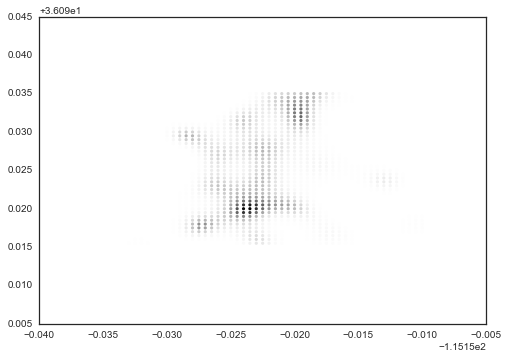

In [217]:
# ===============================================
# Concatenate the result from ESS to alpha+Z[i]
# ===============================================
ess_intensity_surface = np.zeros(M)
last_ess_alpha_z = np.mean(ess_alpha_z, axis=0)
alpha = last_ess_alpha_z[0]
for i in range(M):
    zi = last_ess_alpha_z[i+1]
    ess_intensity_surface[i] = np.exp(alpha+zi)
plot_checkins(ess_intensity_surface)

### 5) In addition, implement the model also in PYMC or vanilla Metropolis Hastings, and compare the result. 

In [143]:
test = np.array([1,2,3])
test[1:] + test[0]

array([3, 4])

In [ ]:
pm.Poisson

In [178]:
pm_prior = pm.MvNormalChol('prior', np.zeros(M+1), Sigma)

@pm.observed
def pm_log_lik(value=checkins, row=pm_prior) :
    total_log_lik = 0
    alpha = row[0]
    for i in range(len(value)):
        yi = value[i]
        zi = row[i+1]
        lambdai = np.exp(alpha+zi)
        # logpmf(x, mu)
        total_log_lik += scipy.stats.poisson.logpmf(yi, (w**2)*lambdai)
        
    return total_log_lik


# @pm.deterministic 
# def pm_lambda(row=pm_prior):
#     alpha = row[0]
#     z = row[1:]
#     return np.exp(alpha + z)
# pm_log_lik = pm.poisson_like(checkins, pm_lambda*(w**2))


# rho = pm.CompletedDirichlet('rho', pm.Dirichlet('rho_h',theta=hyper_alpha))
# z = pm.Container([ pm.Multinomial("z_%i"%i, n=1, p=rho) for i in range(len(reports)) ])  

# theta = pm.Container([ pm.CompletedDirichlet("theta_%i"%k, pm.Dirichlet("theta_h_%i"%k, theta=big_lambda[k])) for k in range(2) ])

# @pm.observed
# def log_likelihood(value=reports, theta=theta, z=z):
#     result = 0
#     N = reports.shape[0]
#     J = reports.shape[1]
#     for i in range(N):
#         idx = np.argmax(z[i])
#         for j in range(J):
#             result += pm.multinomial_like(value[i][j], 1, theta[idx])
            
#     return result

model = pm.Model([pm_log_lik, pm_prior])
mcmc = pm.MCMC(model)
mcmc.sample(iter=1000, burn=250)


 [-----------------100%-----------------] 10000 of 10000 complete in 1565.4 sec

In [181]:
pm_prior.value

array([ 12.35325043,  -0.26395319,   1.13060755, ...,   3.50394951,
        -1.65193717,   2.73693934])

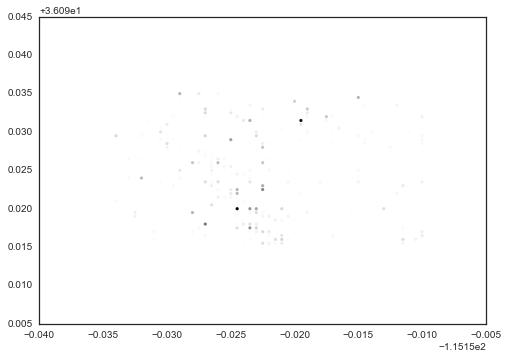

In [182]:
pymc_intensity_surface = np.zeros(M)
last_pymc_alpha_z = pm_prior.value
alpha = last_pymc_alpha_z[0]
for i in range(M):
    zi = last_pymc_alpha_z[i+1]
    pymc_intensity_surface[i] = np.exp(alpha+zi)
plot_checkins(pymc_intensity_surface)

In [183]:
pm_prior = pm.MvNormalChol('prior', np.zeros(M+1), Sigma)

@pm.observed
def pm_log_lik(value=checkins, row=pm_prior) :
    total_log_lik = 0
    alpha = row[0]
    for i in range(len(value)):
        yi = value[i]
        zi = row[i+1]
        lambdai = np.exp(alpha+zi)
        # logpmf(x, mu)
        total_log_lik += scipy.stats.poisson.logpmf(yi, (w**2)*lambdai)
        
    return total_log_lik


# @pm.deterministic 
# def pm_lambda(row=pm_prior):
#     alpha = row[0]
#     z = row[1:]
#     return np.exp(alpha + z)
# pm_log_lik = pm.poisson_like(checkins, pm_lambda*(w**2))


# rho = pm.CompletedDirichlet('rho', pm.Dirichlet('rho_h',theta=hyper_alpha))
# z = pm.Container([ pm.Multinomial("z_%i"%i, n=1, p=rho) for i in range(len(reports)) ])  

# theta = pm.Container([ pm.CompletedDirichlet("theta_%i"%k, pm.Dirichlet("theta_h_%i"%k, theta=big_lambda[k])) for k in range(2) ])

# @pm.observed
# def log_likelihood(value=reports, theta=theta, z=z):
#     result = 0
#     N = reports.shape[0]
#     J = reports.shape[1]
#     for i in range(N):
#         idx = np.argmax(z[i])
#         for j in range(J):
#             result += pm.multinomial_like(value[i][j], 1, theta[idx])
            
#     return result

model = pm.Model([pm_log_lik, pm_prior])
mcmc = pm.MCMC(model)
mcmc.sample(iter=1000, burn=250)


 [-----------------100%-----------------] 1001 of 1000 complete in 166.5 sec

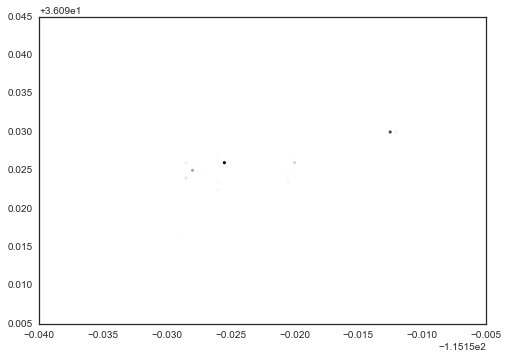

In [185]:
pymc_intensity_surface = np.zeros(M)
last_pymc_alpha_z = pm_prior.value
alpha = last_pymc_alpha_z[0]
for i in range(M):
    zi = last_pymc_alpha_z[i+1]
    pymc_intensity_surface[i] = np.exp(alpha+zi)
plot_checkins(pymc_intensity_surface)

In [224]:
pm_prior = pm.MvNormalChol('prior', np.zeros(M+1), positive_definite_sigma)

@pm.observed
def pm_log_lik(value=checkins, row=pm_prior) :
    alpha = row[0]
    Z = row[1:]
    lambdas = np.exp(alpha+Z)
    log_likelihoods = scipy.stats.poisson.logpmf(value, (w**2)*lambdas)
    return log_likelihoods.sum()
# def pm_log_lik(value=checkins, row=pm_prior) :
#     total_log_lik = 0
#     alpha = row[0]
#     for i in range(len(value)):
#         yi = value[i]
#         zi = row[i+1]
#         lambdai = np.exp(alpha+zi)
#         # logpmf(x, mu)
#         total_log_lik += scipy.stats.poisson.logpmf(yi, (w**2)*lambdai)
        
#     return total_log_lik


# @pm.deterministic 
# def pm_lambda(row=pm_prior):
#     alpha = row[0]
#     z = row[1:]
#     return np.exp(alpha + z)
# pm_log_lik = pm.poisson_like(checkins, pm_lambda*(w**2))


# rho = pm.CompletedDirichlet('rho', pm.Dirichlet('rho_h',theta=hyper_alpha))
# z = pm.Container([ pm.Multinomial("z_%i"%i, n=1, p=rho) for i in range(len(reports)) ])  

# theta = pm.Container([ pm.CompletedDirichlet("theta_%i"%k, pm.Dirichlet("theta_h_%i"%k, theta=big_lambda[k])) for k in range(2) ])

# @pm.observed
# def log_likelihood(value=reports, theta=theta, z=z):
#     result = 0
#     N = reports.shape[0]
#     J = reports.shape[1]
#     for i in range(N):
#         idx = np.argmax(z[i])
#         for j in range(J):
#             result += pm.multinomial_like(value[i][j], 1, theta[idx])
            
#     return result

model = pm.Model([pm_log_lik, pm_prior])
mcmc = pm.MCMC(model)
mcmc.sample(iter=50000, burn=5000)


 [-----------------100%-----------------] 50000 of 50000 complete in 1809.1 sec

In [231]:
len(pm_prior.value)

2001

In [230]:
last_ess_alpha_z = np.mean(ess_alpha_z, axis=0)
last_ess_alpha_z[1500:1600]

array([ 1.52556879,  1.53093759,  1.38699508,  1.12645516,  0.77707747,
        0.38519737, -0.01283802, -0.36481848, -0.68348331, -0.94542143,
       -1.14049491, -1.26519844, -1.25492328, -1.08913931, -0.72773367,
       -0.20657932,  0.41591481,  1.01651927,  1.46964854,  1.70636686,
        1.66330298,  1.14280414,  1.47020655,  1.57686329,  1.39317557,
        0.93319199,  0.23372265, -0.59075415, -1.44476669, -2.18065875,
       -2.70545624, -2.93219314, -2.82499363, -2.40639899, -1.71809339,
       -0.8894775 , -0.06439937,  0.63400189,  1.10590165,  1.33462913,
        1.34956044,  1.18908253,  0.91662731,  0.58045635,  0.22919688,
       -0.11149453, -0.41346297, -0.65448408, -0.84643712, -0.98446554,
       -1.08245685, -1.10961834, -1.01183415, -0.770854  , -0.39375061,
        0.07673537,  0.55311816,  0.91440715,  1.10181019,  1.05892877,
        0.82252946,  0.58568021,  0.8371193 ,  0.89753891,  0.70684584,
        0.26135439, -0.39826671, -1.14349667, -1.89018981, -2.48

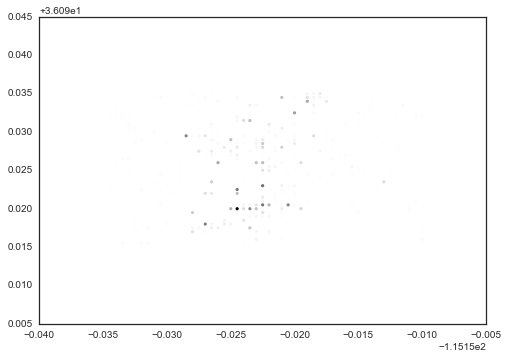

In [225]:
pymc_intensity_surface = np.zeros(M)
last_pymc_alpha_z = pm_prior.value
alpha = last_pymc_alpha_z[0]
for i in range(M):
    zi = last_pymc_alpha_z[i+1]
    pymc_intensity_surface[i] = np.exp(alpha+zi)
plot_checkins(pymc_intensity_surface)



ess_intensity_surface = np.zeros(M)
last_ess_alpha_z = np.mean(ess_alpha_z, axis=0)
alpha = last_ess_alpha_z[0]
for i in range(M):
    zi = last_ess_alpha_z[i+1]
    ess_intensity_surface[i] = np.exp(alpha+zi)
plot_checkins(ess_intensity_surface)

In [255]:
pm_prior = pm.MvNormal('prior', np.zeros(M+1), np.linalg.inv(positive_definite_sigma))

@pm.observed
def log_likelihood(value=checkins, row=pm_prior) :
#     total_log_lik = 0
#     alpha = row[0]
#     for i in range(len(value)):
#         yi = value[i]
#         zi = row[i+1]
#         lambdai = np.exp(alpha+zi)
#         # logpmf(x, mu)
#         total_log_lik += pm.poisson_like(yi, (w**2)*lambdai)
        
#     return total_log_lik
    alpha = row[0]
    Z = row[1:]
    lambdas = np.exp(alpha+Z)
    log_likelihoods = pm.poisson_like(value, (w**2)*lambdas)
    return np.sum(log_likelihoods)

# @pm.observed
# def log_likelihood(value=reports, theta=theta, z=z):
#     result = 0
#     N = reports.shape[0]
#     J = reports.shape[1]
#     for i in range(N):
#         idx = np.argmax(z[i])
#         for j in range(J):
#             result += pm.multinomial_like(value[i][j], 1, theta[idx])
            
#     return result

model = pm.Model([log_likelihood, pm_prior])
mcmc = pm.MCMC(model)
mcmc.sample(iter=10000, burn=1000)


 [-----------------100%-----------------] 10000 of 10000 complete in 3316.3 sec

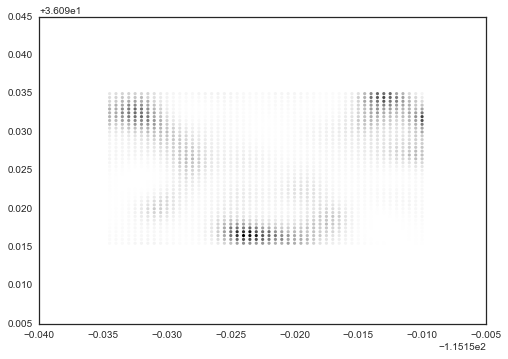

In [256]:
pymc_intensity_surface = np.zeros(M)
last_pymc_alpha_z = pm_prior.value
alpha = last_pymc_alpha_z[0]
for i in range(M):
    zi = last_pymc_alpha_z[i+1]
    pymc_intensity_surface[i] = np.exp(alpha+zi)
plot_checkins(pymc_intensity_surface)

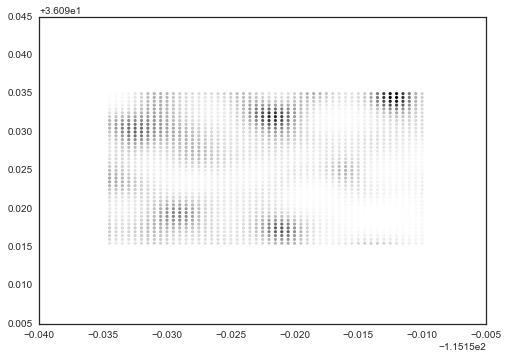

In [251]:
pymc_intensity_surface = np.zeros(M)
last_pymc_alpha_z = pm_prior.value
alpha = last_pymc_alpha_z[0]
for i in range(M):
    zi = last_pymc_alpha_z[i+1]
    pymc_intensity_surface[i] = np.exp(alpha+zi)
plot_checkins(pymc_intensity_surface)

In [276]:
# tau = np.linalg.inv(positive_definite_sigma)
pm_prior = pm.MvNormalCov('prior', np.zeros(M+1), positive_definite_sigma)

@pm.observed
def log_likelihood(value=checkins, row=pm_prior) :
    total_log_lik = 0
    alpha = row[0]
    for i in range(len(value)):
        yi = value[i]
        zi = row[i+1]
        lambdai = np.exp(alpha+zi)
        # logpmf(x, mu)
        total_log_lik += pm.poisson_like(yi, (w**2)*lambdai)
        
    return total_log_lik


model = pm.Model([log_likelihood, pm_prior])
mcmc = pm.MCMC(model)
mcmc.sample(iter=1000, burn=250)

 [-----------------100%-----------------] 1001 of 1000 complete in 125.7 sec

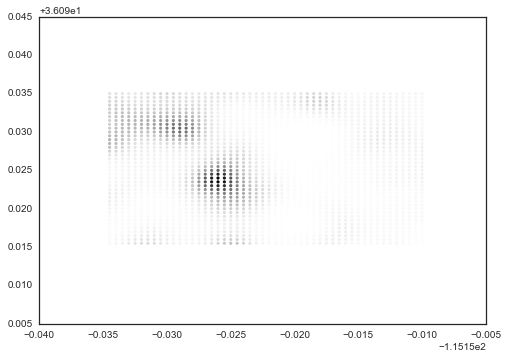

In [277]:
pymc_intensity_surface = np.zeros(M)
last_pymc_alpha_z = pm_prior.value
alpha = last_pymc_alpha_z[0]
for i in range(M):
    zi = last_pymc_alpha_z[i+1]
    pymc_intensity_surface[i] = np.exp(alpha+zi)
plot_checkins(pymc_intensity_surface)

### 6) Finally discuss the differences in results from the conjugate and the non-conjugate model and which one you would prefer. 

In [124]:
print X[0], X[1]
print X[0]-X[1]
print (X[0]-X[1])**2
print ((X[0]-X[1])**2).sum()
print ((X[0]-X[1])**2).sum()/phi

[-115.1845   36.1055] [-115.1845   36.106 ]
[ 0.     -0.0005]
[  0.00000000e+00   2.50000000e-07]
2.50000000002e-07
0.0250000000002


In [123]:
np.exp(-((X[0]-X[1])**2).sum()/phi)

0.9753099120280998

In [133]:
print M

2000


### Helper functions

Here is some code that should be useful:

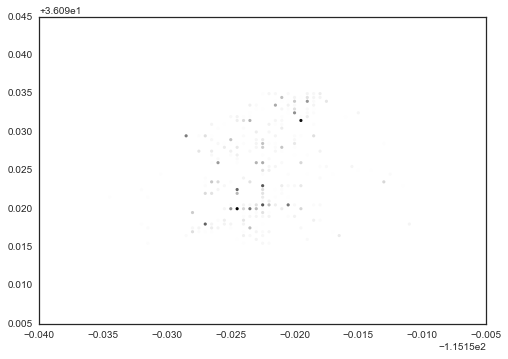

In [73]:
# This function takes a vector of M intensities and plots it according to the coordinates in `X`.
# The values of the intensities are normalized to [0,1] and darker means higher values
def plot_checkins(checkins):
    colors = checkins / np.double(np.max(checkins))
    plt.scatter(X[:,0], X[:,1], s=10, c=colors, cmap='gray_r', edgecolors='none')
#     plt.show()
    
plot_checkins(checkins)

In [129]:
#elliptical slice sampler (Murray, Adams, and MacKay JMLR 2010)
# Inputs:
# Y: observed data
# Sig: covariance matrix of the prior
# log_lik: the log likelihood function
# N_mcmc: number of desired samples
# burn_in: number of burn in iterations
# N: dimensionality of the input, this should be M+1 because alpha is part of Sigma

# returns an array of samples of size N_mcmc x N

    
def ess(Y, Sig,log_lik, N_mcmc, burn_in, N):
    print 'running elliptical slice sampling...'
    mcmc_samples = np.zeros((N_mcmc+burn_in, N))
    norm_samples = np.random.multivariate_normal(np.zeros(N), Sig, N_mcmc+burn_in)
    unif_samples = np.random.uniform(0,1,N_mcmc+burn_in)
    theta = np.random.uniform(0,2*np.pi,N_mcmc+burn_in)
    theta_min = theta-2*np.pi
    theta_max = theta+2*np.pi
    for i in range(1,N_mcmc+burn_in):
        f = mcmc_samples[i-1,:]
        llh_thresh = log_lik(f,Y) + np.log(unif_samples[i])
        f_star = f*np.cos(theta[i])+norm_samples[i,:]*np.sin(theta[i])
        while log_lik(f_star,Y) < llh_thresh:
            if theta[i] < 0:
                theta_min[i] = theta[i]
            else:
                theta_max[i] = theta[i]
            theta[i] = np.random.uniform(theta_min[i],theta_max[i],1)  
            f_star = f*np.cos(theta[i])+norm_samples[i,:]*np.sin(theta[i]) 		
        mcmc_samples[i,:] = f_star
    return mcmc_samples[(burn_in+1):(burn_in+N_mcmc),]

# Problem 2: Point Matching

In this problem you are given two point clouds `points1` and `points2`. Your task is to estimate an affine transformation which can map the points of `points1` onto the points of `points2`. Unfortunately you don't know which points from the two point sets correspond to each other.

We are modeling the correspondences in a correspondence matrix $M$, which is of size $n_1 \times n_2$ where $n_i$ is the number of points in point set $i$. $M_{ij}=1$ indicates that point $x_i$ from `points1` and $y_j$ from `points2` correspond to each other. Each point is only allowed to have one correspondence. So for all $i$ we have $\sum_l^{n_2} M_{il} = 1$ 

The likelihood for this problem is:

$$ \prod_i^{n_1} \prod_j^{n_2} \varphi_{0,\sigma}\left(||Ax_i - y_j||^2\right)^M_{ij} $$

where $\varphi_{0,\sigma}$ is a normal distribution with mean 0 and variance $\sigma^2$. We use $\sigma^2 = 0.1$ as a default for this problem. 

Note: The $M_{ij}$ is not rendering correctly in my notebook. The indices $ij$ are supposed to belong to $M$. Please look at the latex code for clarification.

Estimate the affine transform $A$ that matches the two point sets using expectation maximization and simulated annealing and compare the results. What are the strength of each algorithm? Which one would you prefer in which scenario?

Here are some hints that should be useful:
* The M-step of the problem will be a weighted least squares solution. 
* To use linear algebra to solve the M step it is useful to extend the point matrices to contain all possible pairwise correspondence pairs. 
* The weights for the weighted least squares should be updated in your E-step

In [94]:
print 'hi'

hi


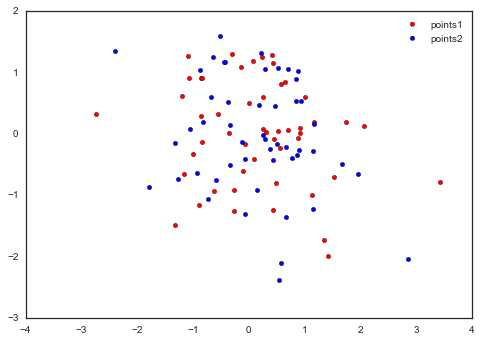

In [4]:
points1 = np.array([[-0.855,  0.905,  1.   ],[ 1.417, -1.999,  1.   ],[-0.896, -1.166,  1.   ],[-0.114, -0.604,  1.   ],
                    [ 2.055,  0.131,  1.   ],[ 0.694,  0.056,  1.   ],[-1.318, -1.495,  1.   ],[ 0.479, -0.799,  1.   ],
                    [-1.081,  0.91 ,  1.   ],[-0.273, -1.258,  1.   ],[ 1.733,  0.188,  1.   ],[ 0.65 ,  0.848,  1.   ],
                    [-0.007,  0.507,  1.   ],[-0.262, -0.922,  1.   ],[-0.14 ,  1.078,  1.   ],[ 0.239,  1.246,  1.   ],
                    [ 0.528,  0.036,  1.   ],[ 0.31 ,  0.025,  1.   ],[-2.734,  0.325,  1.   ],[ 1.014,  0.597,  1.   ],
                    [-0.839, -0.137,  1.   ],[ 0.924,  0.012,  1.   ],[ 0.09 , -0.407,  1.   ],[ 0.433, -1.236,  1.   ],
                    [ 1.345, -1.731,  1.   ],[-0.362,  0.012,  1.   ],[ 0.416,  1.279,  1.   ],[ 1.165,  0.185,  1.   ],
                    [ 0.446, -0.088,  1.   ],[-1.006, -0.335,  1.   ],[ 0.072,  1.188,  1.   ],[ 0.25 ,  0.076,  1.   ],
                    [ 1.525, -0.699,  1.   ],[ 0.574,  0.805,  1.   ],[-1.171, -0.655,  1.   ],[ 0.873, -0.067,  1.   ],
                    [-0.306,  1.291,  1.   ],[-0.07 , -0.174,  1.   ],[-1.088,  1.27 ,  1.   ],[-0.864,  0.295,  1.   ],
                    [-0.845,  0.914,  1.   ],[ 1.136, -1.001,  1.   ],[-0.55 ,  0.328,  1.   ],[-1.201,  0.621,  1.   ],
                    [-0.617, -0.941,  1.   ],[ 0.438,  1.147,  1.   ],[ 0.252,  0.593,  1.   ],[ 3.42 , -0.792,  1.   ],
                    [ 0.923,  0.096,  1.   ],[ 0.563, -0.235,  1.   ]])

points2 = np.array([[-0.131, -0.134,  1.   ],[-2.402,  1.347,  1.   ],[ 0.137, -0.921,  1.   ],[ 0.581, -2.113,  1.   ],
                    [ 0.283,  1.049,  1.   ],[-0.734, -1.058,  1.   ],[ 0.26 , -0.025,  1.   ],[ 0.296, -0.095,  1.   ],
                    [ 0.211,  1.31 ,  1.   ],[ 0.874,  1.023,  1.   ],[-0.336, -0.515,  1.   ],[ 0.859, -0.343,  1.   ],
                    [-0.073, -1.308,  1.   ],[-1.058,  0.075,  1.   ],[ 0.544, -2.389,  1.   ],[-0.827,  0.195,  1.   ],
                    [ 0.666, -1.36 ,  1.   ],[ 0.698,  1.059,  1.   ],[-1.274, -0.734,  1.   ],[-0.52 ,  1.589,  1.   ],
                    [ 1.141, -1.229,  1.   ],[ 0.89 , -0.265,  1.   ],[ 0.521,  1.07 ,  1.   ],[-0.651,  1.254,  1.   ],
                    [-0.686,  0.603,  1.   ],[ 0.502, -0.169,  1.   ],[ 0.925,  0.535,  1.   ],[-0.93 , -0.634,  1.   ],
                    [-0.33 ,  0.149,  1.   ],[-0.431,  1.168,  1.   ],[ 0.43 , -0.433,  1.   ],[ 1.949, -0.665,  1.   ],
                    [-0.872,  1.033,  1.   ],[ 0.378, -0.252,  1.   ],[-1.79 , -0.877,  1.   ],[ 0.781, -0.396,  1.   ],
                    [ 1.147, -0.275,  1.   ],[-0.073, -0.41 ,  1.   ],[ 1.673, -0.489,  1.   ],[-1.332, -0.157,  1.   ],
                    [-0.444,  1.163,  1.   ],[ 0.459,  0.452,  1.   ],[ 0.843,  0.892,  1.   ],[ 0.662, -0.214,  1.   ],
                    [ 0.838,  0.524,  1.   ],[ 0.188,  0.471,  1.   ],[ 1.166,  0.164,  1.   ],[-0.595, -0.751,  1.   ],
                    [-0.382,  0.514,  1.   ],[ 2.857, -2.04 ,  1.   ]])

plt.scatter(points1[:,0], points1[:,1], c='r', label='points1')
plt.scatter(points2[:,0], points2[:,1], c='b', label='points2')
plt.legend()
plt.show()

In [6]:
len(points1),len(points2)

(50, 50)

In [42]:
M = np.identity(len(points1))
M[49][0]=3
print M

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 3.  0.  0. ...,  0.  0.  1.]]


In [51]:
x, y = np.random.choice(range(3), 2, replace=True)
print x, y

1 1


In [103]:
XTXinv = inv(np.dot(shuffled_X.transpose(), shuffled_X))
XTY = np.dot(shuffled_X.transpose(), points2)
A = np.dot(XTXinv, XTY)

In [104]:
A

array([[  5.56358701e-01,   5.05366335e-02,  -2.77555756e-17],
       [  7.73045009e-02,   7.18122170e-01,   6.93889390e-18],
       [  5.54635853e-02,  -6.28868710e-02,   1.00000000e+00]])

In [39]:
A = shuffled_X.transpose

In [100]:
import copy
from numpy.linalg import inv

In [106]:
T = np.arange(3, 0.01, -0.1)
sa_iteration = 20000

sa_traces = [] # only need to track total value
best_error_traces = []

# initialize M to be identity matrix
M = np.identity(len(points1))
sa_error = np.sum(np.abs(points1 - points2))

# initialize best_M
best_M = copy.deepcopy(M)
best_error = sa_error

for temperature in T:
    M = copy.deepcopy(best_M)
    sa_error = best_error
    print 'Best Arrangement of POINTS error trace : ', best_error

    for iteration in range(sa_iteration):
        # swap the 2 rows
        row1_idx, row2_idx = np.random.choice(range(len(points1)), 2, replace=False)
        propose_M = copy.deepcopy(M)
        row1 = copy.deepcopy(propose_M[row1_idx])
        row2 = copy.deepcopy(propose_M[row2_idx])
        propose_M[row1_idx] = row2
        propose_M[row2_idx] = row1

        # fetch 50 shuffled index
        shuffled_index = np.argmax(propose_M, axis=1)

        # Reorder POINTS1 (X) according to shuffled_index
        shuffled_X = points1[shuffled_index]
        
        # compute A matrix
        XTXinv = inv(np.dot(shuffled_X.transpose(), shuffled_X))
        XTY = np.dot(shuffled_X.transpose(), points2)
        A = np.dot(XTXinv, XTY)
        
        # compute Error
        propose_error = np.sum(np.abs(np.dot(shuffled_X, A) - points2))
        deltaE = propose_error - sa_error

        # =========================
        # Simulated Annealing Part
        # =========================
        if propose_error < sa_error:
            M = copy.deepcopy(propose_M)
            sa_error = propose_error

            sa_traces.append(sa_error)
            
        # if proposing M is not good, choose based on temperature
        elif np.random.rand() < np.exp(-1.0*deltaE/temperature):
            M = copy.deepcopy(propose_M)
            sa_error = propose_error

            sa_traces.append(sa_error)

        # to keep the best solution
        if propose_error < best_error:
            best_M = copy.deepcopy(propose_M)
            best_error = propose_error
            best_error_traces.append(best_error)

Best Arrangement of POINTS error trace :  112.608
Best Arrangement of POINTS error trace :  59.4303607231
Best Arrangement of POINTS error trace :  59.2640486354
Best Arrangement of POINTS error trace :  59.2640486354
Best Arrangement of POINTS error trace :  59.2640486354
Best Arrangement of POINTS error trace :  56.8630833407
Best Arrangement of POINTS error trace :  56.8630833407
Best Arrangement of POINTS error trace :  56.0398331621
Best Arrangement of POINTS error trace :  52.0554937426
Best Arrangement of POINTS error trace :  52.0554937426
Best Arrangement of POINTS error trace :  52.0554937426
Best Arrangement of POINTS error trace :  51.5999732696
Best Arrangement of POINTS error trace :  51.5999732696
Best Arrangement of POINTS error trace :  51.5999732696
Best Arrangement of POINTS error trace :  50.626910545
Best Arrangement of POINTS error trace :  50.626910545
Best Arrangement of POINTS error trace :  50.283097268
Best Arrangement of POINTS error trace :  50.283097268
Be

In [115]:
T = np.arange(3, 0.01, -0.1)
sa_iteration = 20000

sa_traces = [] # only need to track total value
best_error_traces = []

# ==========================
# INITIALIZATION
# ==========================
# initialize M to be identity matrix
M = np.identity(len(points1))
# initialilze A to be identity matrix, so error will be sum(|X-Y|)
sa_error = np.sum(np.abs(points1 - points2))
# initialize best_M to be just M for now
best_M = copy.deepcopy(M)
best_error = sa_error

for temperature in T:
    M = copy.deepcopy(best_M)
    sa_error = best_error
    print 'Best Arrangement of POINTS error trace : ', best_error

    for iteration in range(sa_iteration):
        # swap the 2 rows
        row1_idx, row2_idx = np.random.choice(range(len(points1)), 2, replace=False)
        propose_M = copy.deepcopy(M)
        row1 = copy.deepcopy(propose_M[row1_idx])
        row2 = copy.deepcopy(propose_M[row2_idx])
        propose_M[row1_idx] = row2
        propose_M[row2_idx] = row1

        # fetch 50 shuffled index
        shuffled_index = np.argmax(propose_M, axis=1)

        # Reorder POINTS1 (X) according to shuffled_index
        shuffled_X = points1[shuffled_index]
        
        # compute A matrix
        XTXinv = inv(np.dot(shuffled_X.transpose(), shuffled_X))
        XTY = np.dot(shuffled_X.transpose(), points2)
        A = np.dot(XTXinv, XTY)
        
        # compute Error
        propose_error = np.sum(np.abs(np.dot(shuffled_X, A) - points2))
        deltaE = propose_error - sa_error

        # =========================
        # Simulated Annealing Part
        # =========================
        if propose_error < sa_error:
            M = copy.deepcopy(propose_M)
            sa_error = propose_error

            sa_traces.append(sa_error)
            
        # if proposing M is not good, choose based on temperature
        elif np.random.rand() < np.exp(-1.0*deltaE/temperature):
            M = copy.deepcopy(propose_M)
            sa_error = propose_error

            sa_traces.append(sa_error)

        # to keep the best solution
        if propose_error < best_error:
            best_M = copy.deepcopy(propose_M)
            best_error = propose_error
            best_error_traces.append(best_error)

Best Arrangement of POINTS error trace :  112.608
Best Arrangement of POINTS error trace :  61.6932392823
Best Arrangement of POINTS error trace :  61.2555236651
Best Arrangement of POINTS error trace :  59.0130620311
Best Arrangement of POINTS error trace :  59.0130620311
Best Arrangement of POINTS error trace :  56.601478087
Best Arrangement of POINTS error trace :  56.3979691105
Best Arrangement of POINTS error trace :  56.3979691105
Best Arrangement of POINTS error trace :  56.3979691105
Best Arrangement of POINTS error trace :  56.3979691105
Best Arrangement of POINTS error trace :  56.3541295084
Best Arrangement of POINTS error trace :  55.6627482314
Best Arrangement of POINTS error trace :  55.6627482314
Best Arrangement of POINTS error trace :  54.608742722
Best Arrangement of POINTS error trace :  53.381202641
Best Arrangement of POINTS error trace :  53.381202641
Best Arrangement of POINTS error trace :  53.381202641
Best Arrangement of POINTS error trace :  48.9357244564
Bes

(-1, 167)

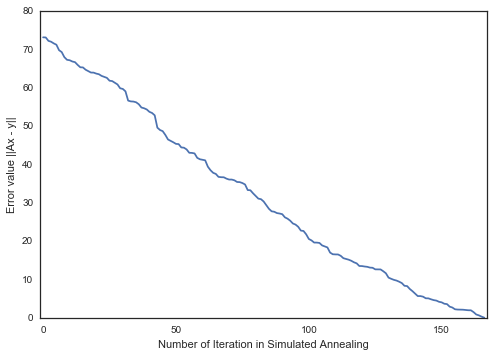

In [117]:
plt.plot(best_error_traces)
plt.xlabel("Number of Iteration in Simulated Annealing")
plt.ylabel("Error value ||Ax - y||")
plt.xlim(-1, len(best_error_traces))

In [131]:
# fetch 50 shuffled index
shuffled_index = np.argmax(best_M, axis=1)

# Reorder POINTS1 (X) according to shuffled_index
shuffled_X = points1[shuffled_index]

# compute A matrix
XTXinv = inv(np.dot(shuffled_X.transpose(), shuffled_X))
XTY = np.dot(shuffled_X.transpose(), points2)
A = np.dot(XTXinv, XTY)

# Move Points1 to map to Points2
moved_points1 = np.dot(shuffled_X, A)

print "Affine Matrix constructed by SA : "
print A

print "\n"
print "Best Arrangement of Points1 to be fitted to Points2 (our latent variable, M matrix) : "
print "correspondence matrix M index = ", shuffled_index

Affine Matrix constructed by SA : 
[[  9.23982723e-01  -3.82589429e-01   8.32667268e-17]
 [  3.82610186e-01   9.23838363e-01   0.00000000e+00]
 [ -4.90965656e-05  -4.89620663e-06   1.00000000e+00]]


Best Arrangement of Points1 to be fitted to Points2 (our latent variable, M matrix) : 
correspondence matrix M index =  [37 18  7 24 14  9 31 17 36 26  3 21 23 29  1 20 41 15  2 38 32 48 30  8 39
 16 11 44 25 40 49  4 43 28  6 35 27 22 10 34  0 46 45  5 33 12 19 13 42 47]


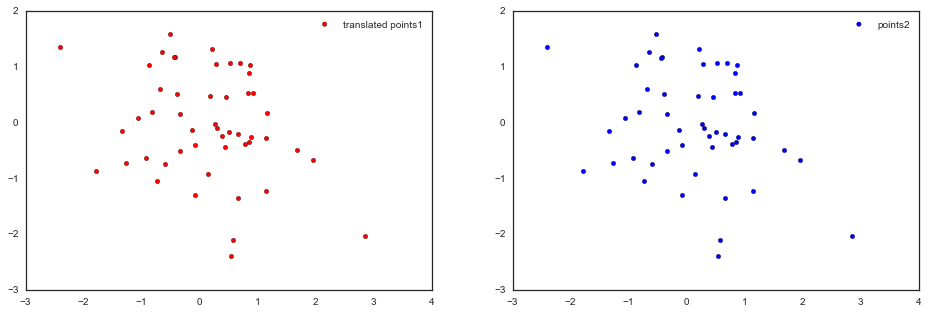

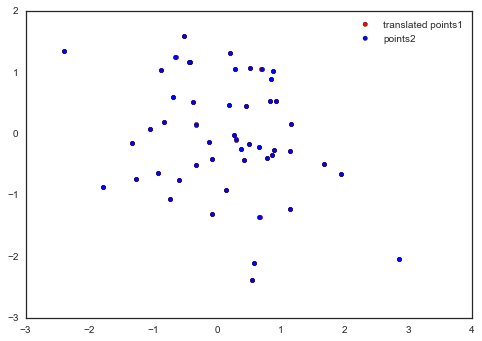

In [133]:

# graphs
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(5)


plt.subplot(1,2,1)
plt.scatter(moved_points1[:, 0], moved_points1[:, 1], c='r', label='translated points1')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(points2[:,0], points2[:,1], c='b', label='points2')
plt.legend()
plt.show()

plt.scatter(moved_points1[:, 0], moved_points1[:, 1], c='r', label='translated points1')
plt.scatter(points2[:,0], points2[:,1], c='b', label='points2')
plt.legend()
plt.show()

In [78]:
best_error_traces[-1]

21.995999999999999

In [67]:
np.sum(np.abs(points1-points2))

112.60799999999998

In [58]:
testx = np.array(['a','b','c'])
testidx = np.array([2,1,1])
print testx[testidx]
print testx

['c' 'b' 'b']
['a' 'b' 'c']


# EM part

In [176]:
std = 0.1

In [146]:
x = np.array([[1,2],[3,4]])
np.repeat(x, 2, axis=0)

array([[1, 2],
       [1, 2],
       [3, 4],
       [3, 4]])

In [155]:
# construct X_prime (2500, 3)
X_prime = np.repeat(points1, points1.shape[0], axis=0)

# construct Y_prime (2500, 3)
Y_prime = np.tile(points2, (points2.shape[0], 1))

In [211]:
def M_step(A, X_prime, Y_prime):
    # construct G matrix
    G = np.zeros((2500, 2500))
    
    # compute the likelihood for each (xi, yj)
    Ax_y = np.dot(X_prime, A) - Y_prime
    norm = np.linalg.norm(Ax_y, axis=1)
    pdf_values = scipy.stats.norm.pdf(norm, loc=0, scale=0.1) # 2500 values
    
    # marginalize : after this, pdf_values would be marginalized by each xi
    for i in range(50):
        pdf_for_xi = pdf_values[i*50:(i+1)*50]
        margin = np.sum(pdf_for_xi)
        pdf_for_xi = pdf_for_xi*1.0/margin
        pdf_values[i*50:(i+1)*50] = pdf_for_xi
        
    
    # insert pdf_values into diagonal positions of G matrix
    di = np.diag_indices(2500)
    G[di] = pdf_values
    
    return G
    

In [221]:
di = np.diag_indices(2500)
print M_step(A, X_prime, Y_prime)[di][:50]

[  3.43098890e-035   1.40964159e-056   3.86986265e-094   6.26136287e-243
   6.12995845e-029   2.32534423e-084   3.81860263e-046   7.53086581e-051
   1.32386154e-028   1.38680331e-065   5.30380732e-050   5.55978472e-098
   5.43457561e-120   3.19993905e-016   1.75773514e-278   2.48794308e-011
   5.27355833e-162   2.96827271e-053   1.63786905e-062   5.79373107e-013
   9.11068200e-186   3.25157405e-096   4.50750678e-042   6.46698916e-004
   5.73579035e-003   2.11488686e-065   3.85105436e-072   6.38751376e-052
   9.19157259e-019   8.98431997e-006   4.25311752e-075   1.27186090e-224
   9.93590901e-001   1.89761159e-062   2.63072233e-088   3.05859026e-095
   1.23303197e-117   3.39264556e-051   2.44518823e-181   8.46654965e-030
   1.76102450e-005   2.57421383e-042   5.59252639e-063   1.57423971e-077
   9.27512803e-066   4.43422511e-028   5.54121985e-101   2.19923802e-061
   1.51801114e-008   0.00000000e+000]


In [222]:
def E_step(G, X_prime, Y_prime):
    # compute matrix A using G, X', Y'
    XG = np.dot(X_prime.transpose(), G)
    XGX = np.dot(XG, X_prime)
    XGX_inv = np.linalg.inv(XGX)
    XGY = np.dot(XG, Y_prime)
    A = np.dot(XGX_inv, XGY)
    return A

In [256]:
print E_step(M_step(A, X_prime, Y_prime), X_prime, Y_prime)

[[  9.22708264e-01  -3.82285353e-01  -2.77555756e-17]
 [  3.82508395e-01   9.22794236e-01  -6.93889390e-18]
 [  5.54468804e-04  -4.43284914e-05   1.00000000e+00]]


In [276]:
# ==========================
# INITIALIZATION
# ==========================
# construct X_prime (2500, 3)
X_prime = np.repeat(points1, points1.shape[0], axis=0)
# construct Y_prime (2500, 3)
Y_prime = np.tile(points2, (points2.shape[0], 1))
# initialize A matrix to be identity
# we can think of it as rotation degree to be 90, and parallel translation to be all 0.
A = np.identity(3)
EM_iteration = 100


# =========================
# Expectation Maximization
# =========================
for i in range(EM_iteration):
    G = M_step(A, X_prime, Y_prime)
    A = E_step(G, X_prime, Y_prime)

    
# ======================================
# using G, find appropriate re-mapped X
# ======================================
correspondence_index = []
for i in range(50):
    prob_for_xi_matrix = G[i*50:(i+1)*50] # (50, 50) matrix
    prob_for_xi_vector = np.sum(prob_for_xi_matrix, axis=1)
    correspondence_index.append(np.argmax(prob_for_xi_vector))

print "================================="    
print "Affine Matrix constructed by EM "
print "================================="    
print A

print "\n"
print "================================="
print "correspondence matrix M index"
print "================================="
print "Best Arrangement of Points2 to be fitted to Points1 (our latent variable, M matrix) = "
print correspondence_index

Affine Matrix constructed by EM 
[[  9.22708264e-01  -3.82285353e-01   0.00000000e+00]
 [  3.82508395e-01   9.22794236e-01  -6.93889390e-18]
 [  5.54468804e-04  -4.43284914e-05   1.00000000e+00]]


correspondence matrix M index
Best Arrangement of Points2 to be fitted to Points1 (our latent variable, M matrix) = 
[40, 14, 18, 10, 31, 43, 34, 2, 23, 5, 38, 26, 45, 47, 4, 17, 25, 7, 1, 46, 15, 11, 37, 12, 3, 28, 9, 36, 33, 13, 22, 6, 20, 44, 39, 35, 8, 0, 19, 24, 29, 16, 48, 32, 27, 42, 41, 49, 21, 30]


In [263]:
test = [40, 14, 18, 10, 31, 43, 34, 2, 23, 5, 38, 26, 45, 47, 4, 17, 25, 7, 1, 46, 15, 11, 37, 12, 3, 28, 9, 36, 33, 13, 22, 6, 20, 44, 39, 35, 8, 0, 19, 24, 29, 16, 48, 32, 27, 42, 41, 49, 21, 30]
print test

[40, 14, 18, 10, 31, 43, 34, 2, 23, 5, 38, 26, 45, 47, 4, 17, 25, 7, 1, 46, 15, 11, 37, 12, 3, 28, 9, 36, 33, 13, 22, 6, 20, 44, 39, 35, 8, 0, 19, 24, 29, 16, 48, 32, 27, 42, 41, 49, 21, 30]


In [272]:
correspondence_index = np.array(correspondence_index)
correspondence_index

array([40, 14, 18, 10, 31, 43, 34,  2, 23,  5, 38, 26, 45, 47,  4, 17, 25,
        7,  1, 46, 15, 11, 37, 12,  3, 28,  9, 36, 33, 13, 22,  6, 20, 44,
       39, 35,  8,  0, 19, 24, 29, 16, 48, 32, 27, 42, 41, 49, 21, 30])

In [267]:
A

array([[  9.22708263e-01,  -3.82285353e-01,   0.00000000e+00],
       [  3.82508393e-01,   9.22794237e-01,   1.38777878e-17],
       [  5.54466775e-04,  -4.43278898e-05,   1.00000000e+00]])

In [241]:
# using G, find appropriate reorderd X
correspondence_index = []
for i in range(50):
    prob_for_xi_matrix = G[i*50:(i+1)*50] # (50, 50) matrix
    prob_for_xi_vector = np.sum(prob_for_xi_matrix, axis=1)
    correspondence_index.append(np.argmax(prob_for_xi_vector))
print correspondence_index

[40, 14, 18, 10, 31, 43, 34, 2, 23, 5, 38, 26, 45, 47, 4, 17, 25, 7, 1, 46, 15, 11, 37, 12, 3, 28, 9, 36, 33, 13, 22, 6, 20, 44, 39, 35, 8, 0, 19, 24, 29, 16, 48, 32, 27, 42, 41, 49, 21, 30]


In [234]:
print shuffled_index


[37 18  7 24 14  9 31 17 36 26  3 21 23 29  1 20 41 15  2 38 32 48 30  8 39
 16 11 44 25 40 49  4 43 28  6 35 27 22 10 34  0 46 45  5 33 12 19 13 42 47]


In [291]:
# ==========================================
# Transform Points1 to be mapped to Points2
# ==========================================
EM_reordered_points2 = points2[correspondence_index]
EM_moved_points1 = np.dot(points1, A)

# ==========================
# Measure the ERROR
# ==========================
print "============================================="
print "ERROR between Points1 and Points2, ||XA - Y||"
print "============================================="
print "error = ", np.sum(np.abs(EM_moved_points1 - EM_reordered_points2))

ERROR between Points1 and Points2, ||XA - Y||
error =  0.099664613852


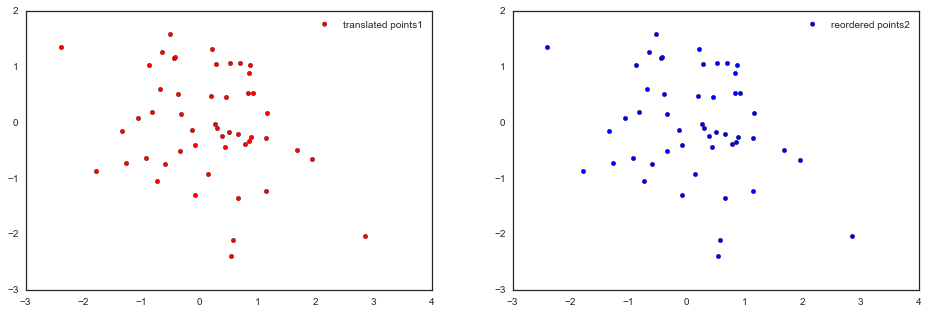

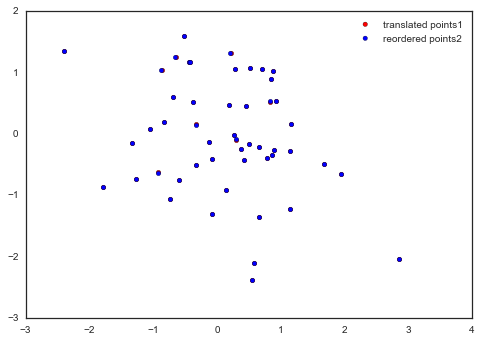

In [283]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(5)


plt.subplot(1,2,1)
plt.scatter(EM_moved_points1[:, 0], EM_moved_points1[:, 1], c='r', label='translated points1')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(EM_reordered_points2[:,0], EM_reordered_points2[:,1], c='b', label='reordered points2')
plt.legend()
plt.show()

plt.scatter(EM_moved_points1[:, 0], EM_moved_points1[:, 1], c='r', label='translated points1')
plt.scatter(EM_reordered_points2[:,0], EM_reordered_points2[:,1], c='b', label='reordered points2')
plt.legend()
plt.show()

In [232]:
test = np.zeros((10,10))
di = np.diag_indices(10)
test[di]=1
print test
print np.sum(test, axis=1)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [210]:
np.diag_indices(2500)

(array([   0,    1,    2, ..., 2497, 2498, 2499]),
 array([   0,    1,    2, ..., 2497, 2498, 2499]))

In [208]:
test = np.array([1.0,2,3,4,5,6,7])
piece = test[0:3]
evidence = np.sum(piece)
piece = piece*1.0/evidence
print piece
test[0:3] = piece
test

[ 0.16666667  0.33333333  0.5       ]


array([ 0.16666667,  0.33333333,  0.5       ,  4.        ,  5.        ,
        6.        ,  7.        ])

In [198]:
Ax_y = np.abs(np.dot(X_prime, A) - Y_prime)
norm = np.linalg.norm(Ax_y, axis=1)
len(norm)
np.sum(scipy.stats.norm.pdf(norm, loc=0, scale=std))

61.206528900103088

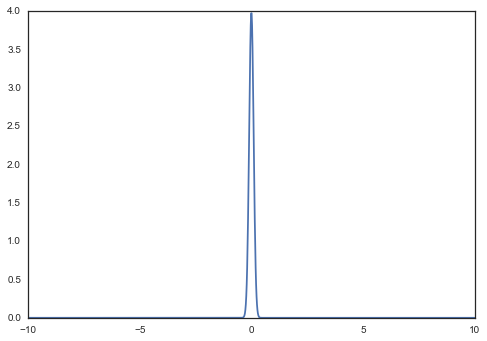

In [188]:
import pylab
from scipy.stats import norm
x = np.linspace(-10,10,1000)
y = norm.pdf(x, loc=0, scale=std)    # for example
pylab.plot(x,y)
pylab.show()

In [183]:
std

0.1

In [166]:
test = np.abs(np.dot(X_prime, A) - Y_prime)
print test.shape
print test

(2500, 3)
[[ 0.724  1.039  0.   ]
 [ 1.547  0.442  0.   ]
 [ 0.992  1.826  0.   ]
 ..., 
 [ 1.158  0.516  0.   ]
 [ 0.945  0.749  0.   ]
 [ 2.294  1.805  0.   ]]


In [163]:
a = np.arange(16).reshape(4, 4)
a
di = np.diag_indices(4)
di
a[di] = [100, 101, 102, 103]
a

array([[100,   1,   2,   3],
       [  4, 101,   6,   7],
       [  8,   9, 102,  11],
       [ 12,  13,  14, 103]])

In [159]:
A = np.identity(3)
A

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

# Problem 3 Time Series

Below you find 200 data points from a time series. Your task is to model this data using a simple autoregressive model:

$$
X_t=\alpha X_{t-1}+r_t
$$
where $r_t$ is normally distributed: $r_t \sim\mathcal{N}(0,\sigma^2)$

Here are your tasks:
* Implement a maximum likelihood estimation(MLE) method to estimate $\alpha$
* Use any MCMC algorithm of your choice to infere $\sigma^2$ and $\alpha$
* Forecast 3 time points ahead and provide posteriors for these three points

In [284]:
# Here is the data
y=np.array([0.00000000e+00,  -2.41884381e-01,  -2.19815584e-01, -5.92654275e-03,   3.89498469e-02,  -7.06374756e-01,
         6.09244734e-02,  -1.36663360e+00,  -1.63887006e+00, -1.31721354e+00,  -1.52424274e+00,  -1.23902096e+00,
        -6.63029664e-01,  -5.97693396e-01,   1.26359198e-01, 6.55116724e-01,   2.98253859e-01,   7.19461104e-03,
         4.04113046e-01,   7.29893878e-01,  -1.96731327e-03, 4.64230686e-01,  -6.79727540e-02,  -4.19137503e-01,
        -4.03256074e-01,  -8.70131096e-01,  -8.25921060e-01, 4.69417714e-01,  -1.00177377e-01,   6.34076840e-02,
        -1.05978178e-01,  -1.48916430e-01,  -5.43573786e-02, 4.61970441e-01,   8.18280558e-01,   2.87185308e-01,
         1.26715777e+00,   6.41828280e-01,   8.77364512e-01, 3.67214345e-01,   6.26413729e-01,   2.87102039e-02,
         4.28449069e-01,   7.31450267e-01,   6.19131504e-01, 6.33373751e-01,   3.17572088e-01,   3.51692600e-01,
        -2.48995087e-02,  -2.53030153e-01,  -2.15503832e-01,-6.20238803e-01,  -5.28176551e-01,  -5.99112522e-01,
         3.32834574e-01,   4.01426008e-01,  -6.37956657e-01,-4.52884655e-01,  -1.16203988e+00,  -8.82257305e-01,
        -6.19309194e-01,  -4.78009274e-01,  -2.32960888e-01, 3.80860392e-01,  -5.52337194e-01,   6.43589528e-01,
        -1.71939822e-01,  -2.22714248e-02,   1.69698173e-01, 2.26875861e-01,   6.27784254e-02,   9.59070565e-01,
        -2.00412521e-01,   1.62853318e-02,  -1.64492388e-02,-5.92514844e-01,  -1.43386816e-01,  -9.50829381e-01,
        -1.07109089e+00,  -5.47941202e-01,  -6.80501959e-01,-1.22073393e+00,  -5.09858830e-01,  -1.24176275e+00,
        -6.30383282e-01,  -8.67182207e-01,  -9.67761290e-01,-1.79674059e-01,   6.09919157e-01,   9.95635469e-02,
         2.28199545e-01,   4.21792446e-01,   1.69467875e-01,-2.59645693e-01,  -4.93207819e-01,  -5.01539736e-01,
        -6.05873935e-01,  -6.11037064e-01,   1.01647103e-01,-1.44991643e-01,  -4.33238432e-02,  -6.41062073e-02,
        -2.85514261e-01,  -3.95586179e-01,  -3.57194799e-01,-2.20170569e-01,  -3.39918202e-01,   1.70035788e-01,
         7.41558107e-01,   8.33120964e-01,   3.73995334e-01, 4.83141624e-01,  -1.28861162e-01,  -4.22192149e-01,
         5.78378631e-01,   1.43550174e-01,  -1.31226657e-01,-5.30885377e-01,  -8.76270272e-01,  -4.34154230e-01,
        -5.02379201e-01,  -5.14585915e-01,  -4.64397849e-01, 1.65475660e-01,   1.07774616e-01,  -9.65587168e-01,
        -8.60566293e-01,  -2.36405434e-01,  -4.12606502e-01,-5.58566210e-01,   1.20028400e+00,   9.96896069e-01,
         4.41653164e-01,   1.59249052e-01,  -1.74168536e-01, 5.63049814e-01,   7.39366310e-01,   6.05361272e-01,
         2.79509214e-01,  -6.26883609e-01,  -4.44982987e-01,-8.69359696e-01,  -9.27422224e-01,  -6.98179880e-01,
        -1.35445853e+00,  -1.12329955e+00,  -4.94572306e-01,-3.40507834e-01,  -8.37907253e-01,  -9.97003760e-01,
        -7.69088724e-01,  -4.77378429e-01,   4.52315984e-02, 8.76114754e-02,  -9.24336169e-02,   4.42178858e-01,
         6.32190755e-01,   8.18383124e-01,   2.95975304e-01,-2.38797237e-02,   1.16395924e-01,   5.62311884e-02,
        -3.15966789e-01,  -3.16808474e-01,  -1.16651970e+00,-1.01729199e+00,  -7.75285712e-01,  -4.17618624e-01,
        -7.65156825e-01,  -5.10469718e-01,  -3.25334859e-01, 1.06358791e-01,   4.03467712e-01,   5.62837155e-01,
         5.87793605e-01,   4.38191557e-01,  -4.17879322e-01,-3.19715350e-01,   3.41624528e-01,   4.93054502e-01,
         3.69746949e-01,   9.62398763e-02,  -2.81485049e-01,-3.37776564e-01,  -1.30858217e-03,   9.83538405e-01,
         6.94986165e-01,   2.41137851e-01,   2.79478944e-01, 5.13500357e-01,   4.17786188e-01,   7.46707509e-01,
         1.25038407e+00,   8.17699739e-01,   8.78811468e-02,-1.20413802e-01,  -1.83227208e-01,   8.06195706e-02,
         4.16043086e-01,   6.45585187e-02])


## 1) Implement a maximum likelihood estimation(MLE) method to estimate $\alpha$

$$
Likelihood = P(\{X\}|\alpha) = P(X_T, X_{T-1}, \dots, X_1 | \alpha)
$$


If we use chain rule to expand this formula

$$
P(X_T, X_{T-1}, \dots, X_1 | \alpha) = P(X_T | X_{T-1}, \dots, X_1, \alpha) P(X_{T-1} | X_{T-2}, \dots, X_1, \alpha) \dots P(X_1 | X_0, \alpha) P(X_0, \alpha)
$$


And since our TimeSeries data $X_t=\alpha X_{t-1}+r_t$ is AR(1), so it only depends on its previous value, so the Likelihood above can be simplified as below :
$$
P(X_T, X_{T-1}, \dots, X_1 | \alpha) = P(X_T | X_{T-1}, \alpha) P(X_{T-1} | X_{T-2}, \alpha) \dots P(X_1 | X_0, \alpha) P(X_0, \alpha) = P(X_0, \alpha)\prod_{t=1}^{T} P(X_t | X_{t-1}, \alpha)
$$


Since $r_t$ is normally distributed: $r_t \sim\mathcal{N}(0,\sigma^2)$, $P(X_t | X_{t-1}, \alpha)$ is also normally distributed.
$$
P(X_t | X_{t-1}, \alpha) \sim\mathcal{N}(\alpha X_{t-1}, \sigma^2)
$$


Therefore, our likelihood can be written as follows :
$$
Likelihood = P(X_0, \alpha)\prod_{t=1}^{T} P(X_t | X_{t-1}, \alpha) = P(X_0, \alpha)\Big(\frac{1}{\sqrt{2\pi\sigma^2}}\Big)^T \exp(\sum_{t=1}^{T} \frac{(X_t - \alpha X_{t-1})^2}{2\sigma^2})
$$


If we take log to make Log-Likelihood :
$$
Log-Likelihood = \mathcal{L} = -\frac{T}{2}\log(2\pi) - \frac{T}{2}\log(\sigma^2) - \sum_{t=1}^{T} \frac{(X_t - \alpha X_{t-1})^2}{2\sigma^2}
$$


If we take derivative with respect to $\alpha$, then
$$
\frac{\partial \mathcal {L}}{\partial \alpha} = \frac{1}{\sigma^2}\sum_{t=1}{T} (X_t - \alpha X_{t-1}) X_{t-1} = 0
$$
$$
\sum_{t=1}^{T} X_t X_{t-1} = \sum_{t=1}^{T} \alpha X_{t-1}^2
$$
$$
\therefore \alpha_{MLE} = \frac{\sum_{t=1}^{T} X_t X_{t-1}}{\sum_{t=1}^{T} X_t^2}
$$

In [296]:
variance = np.sum(y*y)
cov = 0
for i in range(len(y)-1):
    cov += y[i]*y[i+1]

print "Covariance = ", cov
print "Variance = ", variance

alpha_MLE = cov/variance
print "Alpha_MLE = ", alpha_MLE

Covariance =  48.2478305474
Variance =  70.7854257499
Alpha_MLE =  0.681606842599


## 2) Use any MCMC algorithm of your choice to infere $\sigma^2$ and $\alpha$

* Let's use PYMC to estimate $\sigma^2$ and $\alpha$
* Since each value-pair follows normal distribution, $P(X_t | X_{t-1}, \alpha) \sim\mathcal{N}(\alpha X_{t-1}, \sigma^2)
$, we can define each pair using pm.Normal and put them in pm.Container
* For prior $\alpha$, as we've seen above in problem (1), $\alpha_{MLE}$ was 0.68 so it is likely to be between -1 < $\alpha$ < 1, therefore resulting this TimeSeries to be stationary. So let's use uniform distriution between (-1, 1) as the prior
* For prior $\sigma^2$, since we have no information related to $\sigma^2$, so let's use uniform distribution as well, having mean value as Variance we computed above.

In [304]:
# define priors, alpha and sigma
pm_alpha = pm.Uniform(name='alpha', lower=-1, upper=1)
pm_sigma = pm.Uniform(name='sigma', lower=0, upper=2*np.sqrt(variance))
# define likelihood
pm_likelihood = pm.Container( [ pm.Normal(name='X_%i'%i, mu=pm_alpha*y[i-1], tau=1.0/pm_sigma, value=y[i], observed=True) \
                              for i in range(1, len(y)) ] )

model = pm.Model([pm_likelihood, pm_alpha, pm_sigma])
mcmc = pm.MCMC(model)
mcmc.sample(iter=10000, burn=2500)

 [-----------------100%-----------------] 10000 of 10000 complete in 32.7 sec


alpha:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.681            0.054            0.002            [ 0.572  0.781]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.577            0.643           0.678          0.718         0.792
	
Plotting alpha


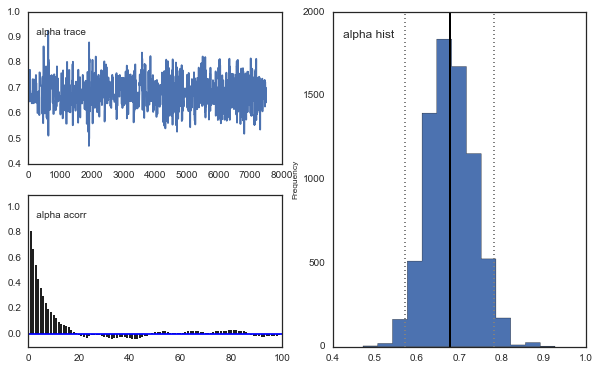

In [305]:
pm_alpha.summary()
pm.Matplot.plot(pm_alpha)


sigma:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.196            0.02             0.001            [ 0.153  0.232]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.159            0.183           0.195          0.207         0.24
	
Plotting sigma


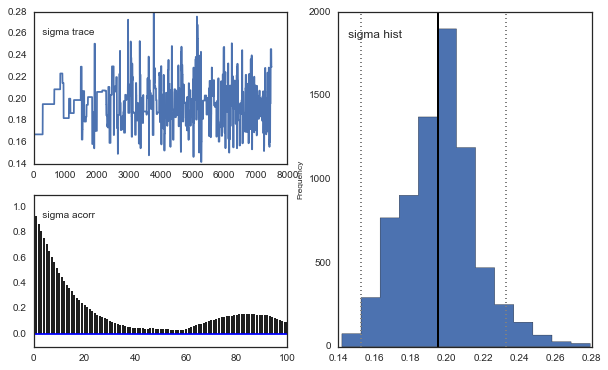

In [306]:
pm_sigma.summary()
pm.Matplot.plot(pm_sigma)

## 3) Forecast 3 time points ahead and provide posteriors for these three points
* To predict time points ahead, we can describe future points distribution using posterior predictive.
* For each future time point, let's define its posterior predictive using the likelihood (normal distribution) and priors ($\alpha, \sigma^2$) we just defined in above problem (2).

### (a) predict $X_{T+1}$

In [307]:
pm_X_Tplus1 = pm.Normal(name='X_T+1', mu=pm_alpha*y[-1], tau=1.0/pm_sigma)
model = pm.Model([pm_X_Tplus1])
mcmc = pm.MCMC(model)
mcmc.sample(iter=10000, burn=2500)

 [-----------------100%-----------------] 10000 of 10000 complete in 44.4 sec


X_T+1:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.054            0.445            0.005            [-0.817  0.896]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.814           -0.255          0.059          0.358         0.907
	
Plotting X_T+1


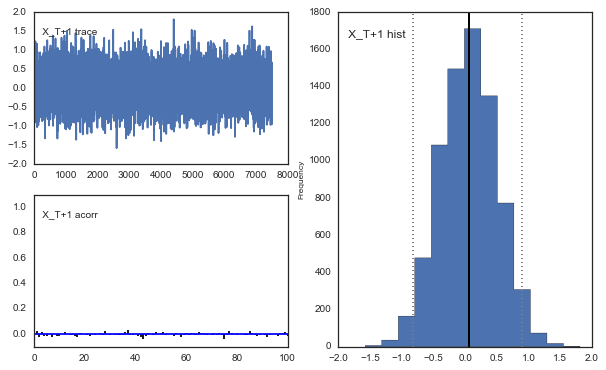

In [308]:
pm_X_Tplus1.summary()
pm.Matplot.plot(pm_X_Tplus1)

### (b) predict $X_{T+2}$
* Now we use pymc variable $X_{T+1}$ and pymc varialbe $\alpha$ to estimate posterior predictive of $X_{T+2}$

In [310]:
pm_X_Tplus2 = pm.Normal(name='X_T+2', mu=pm_alpha*pm_X_Tplus1, tau=1.0/pm_sigma)
model = pm.Model([pm_X_Tplus2])
mcmc = pm.MCMC(model)
mcmc.sample(iter=10000, burn=2500)

 [-----------------100%-----------------] 10000 of 10000 complete in 46.0 sec


X_T+2:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.045            0.538            0.006            [-0.994  1.107]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.994           -0.315          0.045          0.411         1.109
	
Plotting X_T+2


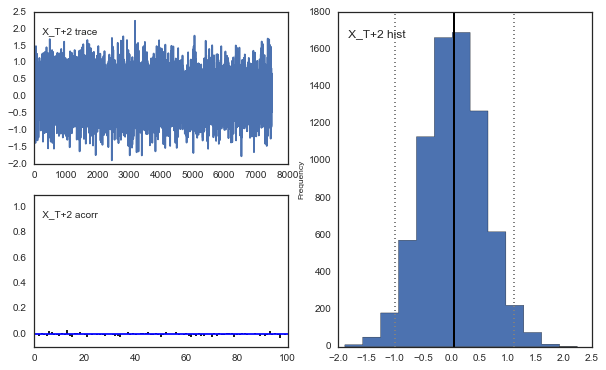

In [312]:
pm_X_Tplus2.summary()
pm.Matplot.plot(pm_X_Tplus2)

### (c) predict $X_{T+3}$

In [314]:
pm_X_Tplus3 = pm.Normal(name='X_T+3', mu=pm_alpha*pm_X_Tplus2, tau=1.0/pm_sigma)
model = pm.Model([pm_X_Tplus3])
mcmc = pm.MCMC(model)
mcmc.sample(iter=10000, burn=2500)

 [-----------------100%-----------------] 10000 of 10000 complete in 44.3 sec


X_T+3:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.388           0.512            0.01             [-1.425  0.583]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-1.387           -0.732          -0.393         -0.051        0.626
	
Plotting X_T+3


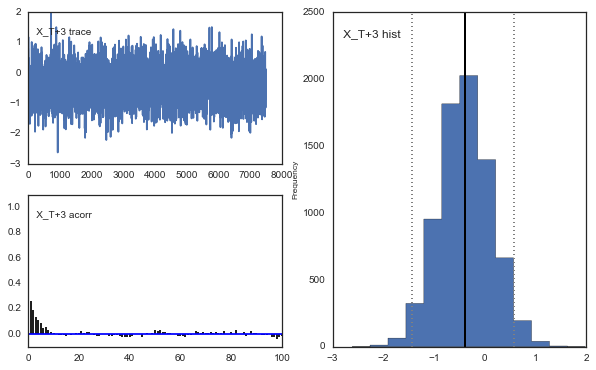

In [315]:
pm_X_Tplus3.summary()
pm.Matplot.plot(pm_X_Tplus3)

# Extra Problem 4: Final Project Proposal 

Think about your final project proposal. Your final project is your chance to show off what you learned in AM207! You have seen a lot of different models and examples in lecture and in the homework assignments. In your final project you are free to apply all the techniques you learned to an area of your choice. Be careful not to choose data that you still need to label yourself or that will take you ages to clean. The main focus should be on finding a good model and comparing different techniques for sampling, optimization, etc. 

Please note that there will be a google spreadsheet where you can submit your final project proposal abstract. No need to write it into this notebook. 

The abstract should be short, but contain a short description of your final project idea, which methods you are planning on using, and where your data will come from. 